In [1]:
import numpy as np
import keras

Using Theano backend.
/home/vivek/anaconda3/envs/keras_env/lib/python3.6/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/vivek/anaconda3/envs/keras_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of num

In [2]:
from keras.datasets import mnist
(trainX, trainy), (testX, testy) =mnist.load_data()

In [3]:
trainX.shape, testX.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache using fc-list. This may take a moment.


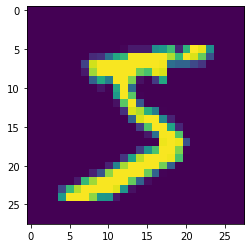

In [8]:
plt.imshow(trainX[0])

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [5]:
trainX = trainX.reshape((trainX.shape[0], 28*28)).astype('float32')
testX = testX.reshape((testX.shape[0], 28*28)).astype('float32')

In [6]:
X_train = trainX / 255
X_test = testX / 255

In [12]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
y_train = np_utils.to_categorical(trainy)
y_test = np_utils.to_categorical(testy)
num_classes = 10

In [14]:
def ANN_model():
    model = Sequential()
    model.add(Dense(28*28, input_dim=28*28, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
ANNmodel = ANN_model()
# Fit the model
ANNmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=5000, verbose=2)
# Final evaluation of the model
scores = ANNmodel.evaluate(X_test, y_test, verbose=0)
scores

KeyboardInterrupt: 

In [7]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [9]:
def CNN_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
CNNmodel = CNN_model()
# Fit the model
CNNmodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=500)
# Final evaluation of the model
scores = CNNmodel.evaluate(X_test, y_test, verbose=0)
scores